The use case is to predict the number of wins for a given team in 2015 season based on several indicators like Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors. Its a regression problem since the target variable "Wins (W)" is a numeric value. Reference for full forms of abbrevaitions is used from the wikipedia link given in the problem statement

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [120]:
#Lets read the csv files
df1=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
#now lets convert the csv files to a DataFrame
Baseball=pd.DataFrame(data=df1)
Baseball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
Baseball.shape
#The dataset has 30 rows and 17 columns

(30, 17)

In [5]:
Baseball.dtypes
#values are float or integer types.

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [6]:
#lets see if there are missing values or not
Baseball.isnull().sum()
#there seems to be no missing values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

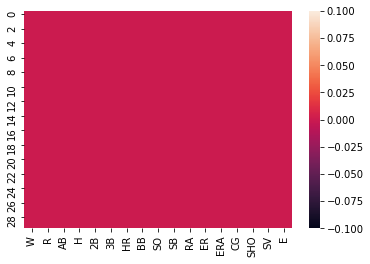

In [7]:
# lets confirm by heatmap if missing values are present or not
sns.heatmap(Baseball.isnull())
#Hennce the results are confirmed that no missing values are present

In [8]:
Baseball.describe()
# the difference between the mean and the median is not much in all the columns and hence the skewness present would be miniscule.
# the spread of data is the most in run average (RA) column
# the possiblity of outliers to be present the most is in plate appearances per strikeout(SO)
#the median value is the highest for at bats (AB) and so is the mean compared to other columns

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [9]:
#Lets perform univariate analysis for all attributes

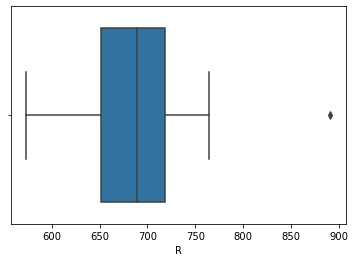

In [13]:
Runs_Scored_1=sns.boxplot(Baseball["R"])
#The minimum value is 573. The median value is 689 and the maximum value is 891. The whisker values are 651 (minimum to 25th percentile) to 718.25(75th percentile to maximum value)
#One outlier is present. 

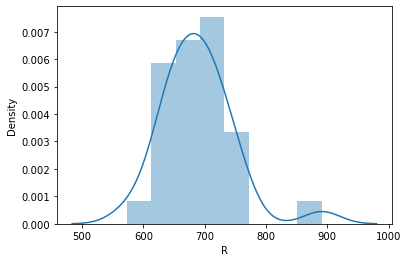

In [15]:
Run_Scored_2=sns.distplot(Baseball["R"])
#The density of data lies between 610 to 710. 
#There is a slight skewness present to the right but more or less it seems like normally distributed  

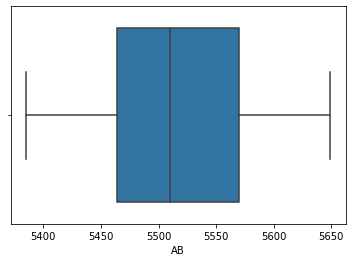

In [25]:
At_Bats_1=sns.boxplot(Baseball["AB"])
#The minimum value is 5385. The median value is 5510 and the maximum value is 5649. The whisker values are 5464(minimum to 25th percentile) to 5570(75th percentile to maximum value)
#There are no outliers present.

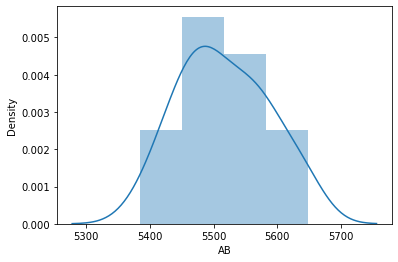

In [26]:
At_Bats_2=sns.distplot(Baseball["AB"])
#The density of data lies between 5450 to 5600 
#There is no skewness present, it seems like normally distributed data.

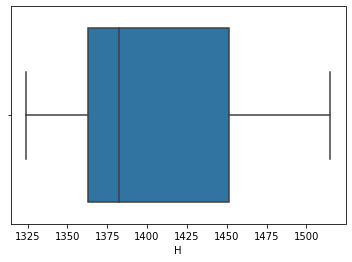

In [18]:
Hits_1=sns.boxplot(Baseball["H"])
#The minimum value is 1324. The median value is 1382 and the maximum value is 1515. The whisker values are 1363(minimum to 25th percentile) to 1451(75th percentile to maximum value)
#There are no outliers present.

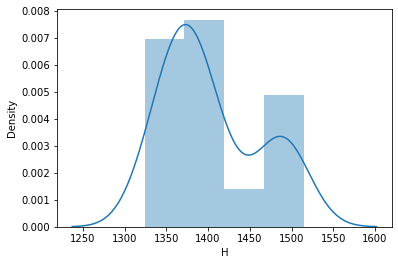

In [19]:
Hits_2=sns.distplot(Baseball["H"])
#The density of data lies between 1325 to 1410. It goes down again and sees a spike from 1475 to 1510 
#More or less it seems like a normally distributed data with skewness absent

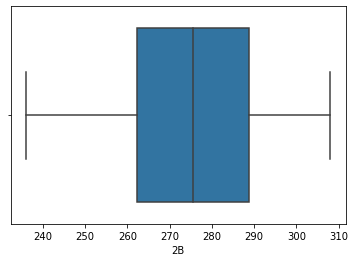

In [21]:
Double_1=sns.boxplot(Baseball["2B"])
#The minimum value is 236. The median value is 275 and the maximum value is 308. The whisker values are 262.25(minimum to 25th percentile) to 288(75th percentile to maximum value)
#There are no outliers present.

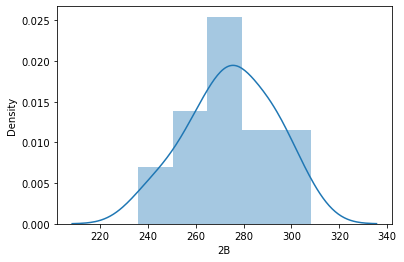

In [22]:
Double_2=sns.distplot(Baseball["2B"])
#The density of data lies between 260 to 280.
#More or less it seems like a normally distributed data with skewness absent

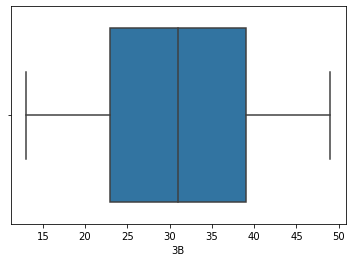

In [23]:
Triple_1=sns.boxplot(Baseball["3B"])
#The minimum value is 13. The median value is 31 and the maximum value is 49. The whisker values are 23(minimum to 25th percentile) to 39(75th percentile to maximum value)
#There are no outliers present.

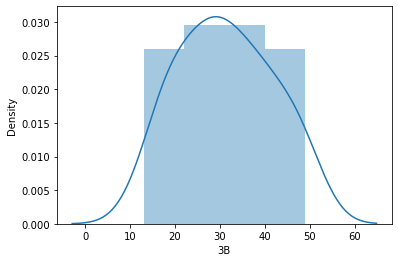

In [24]:
Triple_2=sns.distplot(Baseball["3B"])
#The density of data lies between 15 to 48.
#More or less it seems like a normally distributed data with skewness absent

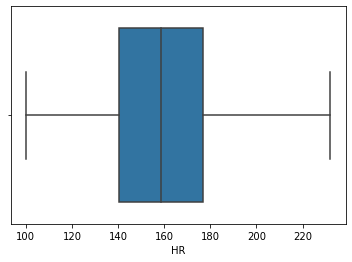

In [27]:
Home_Run_1=sns.boxplot(Baseball["HR"])
#The minimum value is 100. The median value is 158 and the maximum value is 232. The whisker values are 140.25(minimum to 25th percentile) to 177(75th percentile to maximum value)
#There are no outliers present.

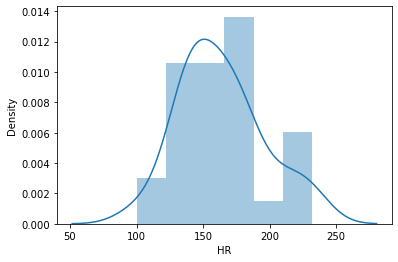

In [29]:
Home_Run_2=sns.distplot(Baseball["HR"])
#The density of data lies between 125 to 175 and then spikes again from 210 to 225
#More or less it seems like a normally distributed data with skewness absent

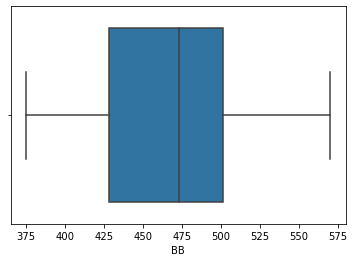

In [30]:
Walk_to_strikeout_ratio_1=sns.boxplot(Baseball["BB"])
#The minimum value is 375. The median value is 473 and the maximum value is 570. The whisker values are 428.25(minimum to 25th percentile) to 501.25(75th percentile to maximum value)
#There are no outliers present.

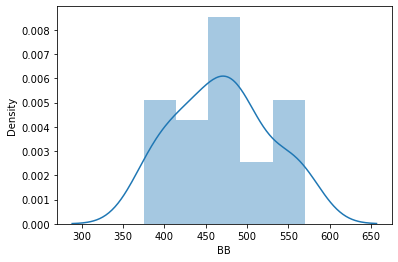

In [31]:
Walk_to_strikeout_ratio_2=sns.distplot(Baseball["BB"])
#The density of data lies between 325 to 480 and then spikes again from 525 to 575
#More or less it seems like a normally distributed data with skewness absent

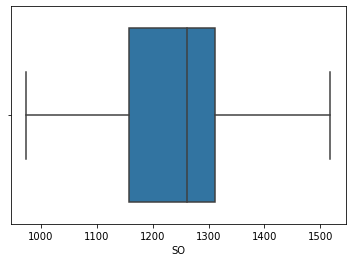

In [40]:
Plate_appearances_per_strikeout_1=sns.boxplot(Baseball["SO"])
#The minimum value is 973. The median value is 1261 and the maximum value is 1518. The whisker values are 1157(minimum to 25th percentile) to 1311.5(75th percentile to maximum value)
#There are no outliers present.

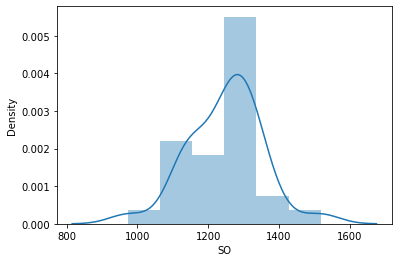

In [41]:
Plate_appearances_per_strikeout_2=sns.distplot(Baseball["SO"])
#The density of data lies between 1210 to 1375
#There is a slight skewness to the left but more or less it seems like normally distributed

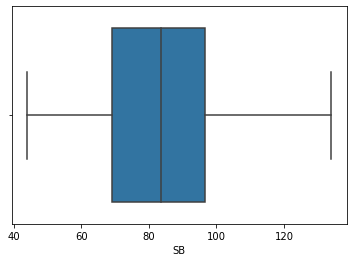

In [42]:
Stolen_Bases_1=sns.boxplot(Baseball["SB"])
#The minimum value is 44. The median value is 83.5 and the maximum value is 134. The whisker values are 69(minimum to 25th percentile) to 96.5(75th percentile to maximum value)
#There are no outliers present.

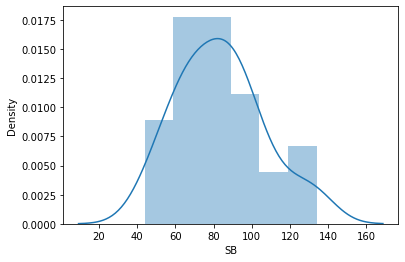

In [43]:
Stolen_Bases_2=sns.distplot(Baseball["SB"])
#The density of data lies between 60 to 85
#More or less it seems like normally distributed

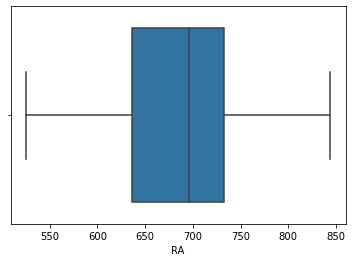

In [44]:
Run_Average_1=sns.boxplot(Baseball["RA"])
#The minimum value is 525. The median value is 695 and the maximum value is 844. The whisker values are 636.25(minimum to 25th percentile) to 732.5(75th percentile to maximum value)
#There are no outliers present.

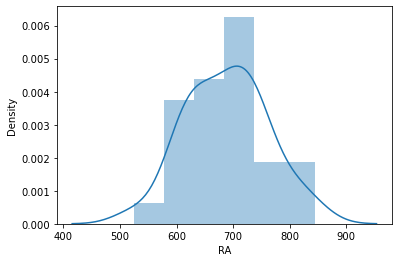

In [45]:
Run_Average_2=sns.distplot(Baseball["RA"])
#The density of data lies between 600 to 725
#More or less it seems like normally distributed

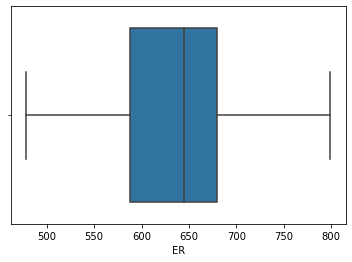

In [46]:
Earned_Runs_1=sns.boxplot(Baseball["ER"])
#The minimum value is 478. The median value is 644.5 and the maximum value is 799. The whisker values are 587.25(minimum to 25th percentile) to 679.25(75th percentile to maximum value)
#There are no outliers present.

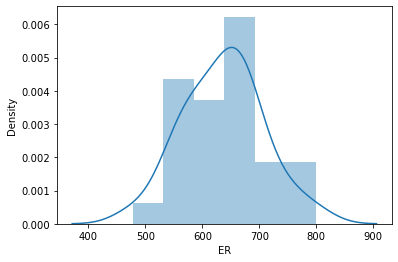

In [47]:
Earned_Runs_2=sns.distplot(Baseball["ER"])
#The density of data lies between 525 to 700
#More or less it seems like normally distributed

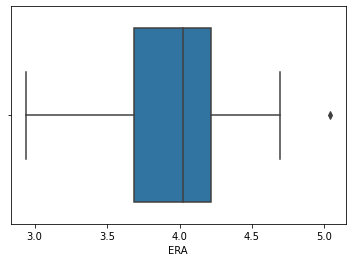

In [48]:
Earned_Runs_Average_1=sns.boxplot(Baseball["ERA"])
#The minimum value is 2.94. The median value is 4.025 and the maximum value is 5.04. The whisker values are 3.68(minimum to 25th percentile) to 4.22(75th percentile to maximum value)
#There is one outlier present.

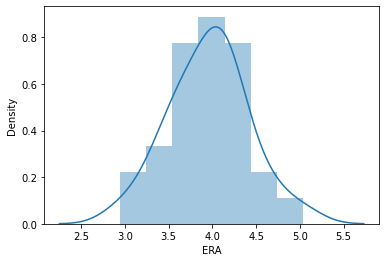

In [49]:
Earned_Runs_Average_2=sns.distplot(Baseball["ERA"])
#The density of data lies between 3.5 to 4.5
#More or less it seems like normally distributed

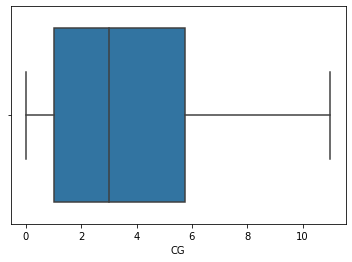

In [50]:
Complete_Games_1=sns.boxplot(Baseball["CG"])
#The minimum value is 0. The median value is 3 and the maximum value is 11. The whisker values are 1(minimum to 25th percentile) to 5.75(75th percentile to maximum value)
#There are no outliers present.

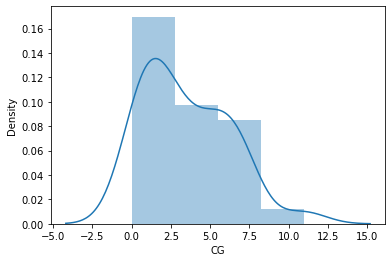

In [51]:
Complete_Games_2=sns.distplot(Baseball["CG"])
#The density of data lies between 0 to 2.5
#Some skewness to the right is present.

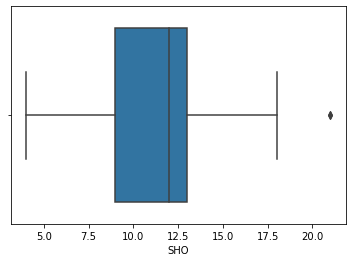

In [52]:
Shoutouts_1=sns.boxplot(Baseball["SHO"])
#The minimum value is 4. The median value is 12 and the maximum value is 21. The whisker values are 9(minimum to 25th percentile) to 13(75th percentile to maximum value)
#There is one outlier present.

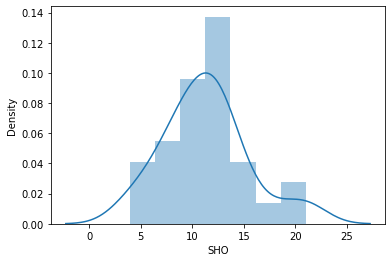

In [53]:
Shoutouts_2=sns.distplot(Baseball["SHO"])
#The density of data lies between 9 to 14
#Slight right skewness is present however, more or less it is normally distributed.

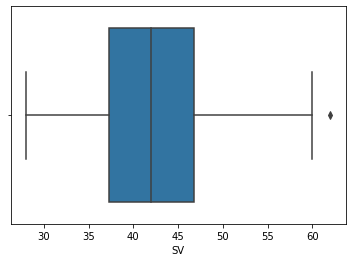

In [79]:
Saves_1=sns.boxplot(Baseball["SV"])
#The minimum value is 28. The median value is 42 and the maximum value is 62. The whisker values are 37.25(minimum to 25th percentile) to 46.75(75th percentile to maximum value)
#There is one outlier present.

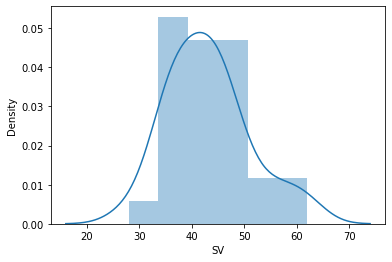

In [80]:
Saves_2=sns.distplot(Baseball["SV"])

#The density of data lies between 33 to 50
#More or less it is normally distributed.

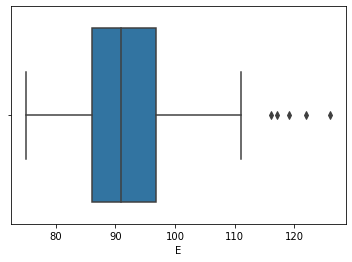

In [56]:
Errors_1=sns.boxplot(Baseball["E"])
#The minimum value is 75. The median value is 91 and the maximum value is 126. The whisker values are 86(minimum to 25th percentile) to 96.75(75th percentile to maximum value)
#There are 5 outliers present.

In [57]:
#Lets perform bivariate analysis

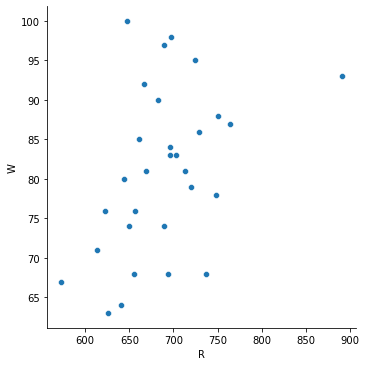

In [61]:
Runs_Scored_3=sns.relplot(x="R",y="W",kind="scatter",data=Baseball)
#As the runs scored increases, the chances of wins also increase in most cases

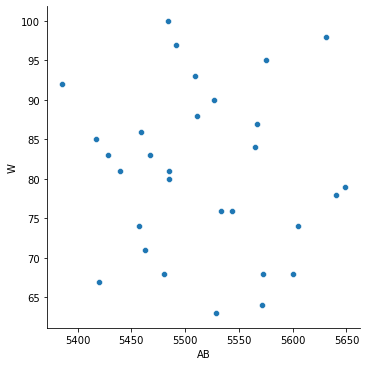

In [64]:
At_Bats_3=sns.relplot(x="AB",y="W",kind="scatter",data=Baseball)
#No concrete conlcusion can be made,however, at bats in the range of 5500 to 5500 have more chances to win in most cases.

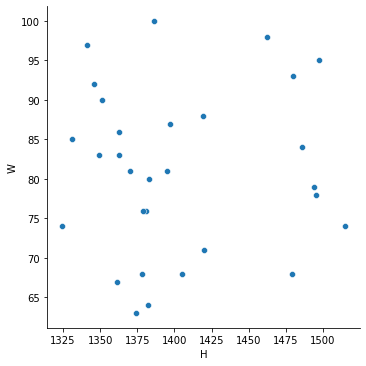

In [65]:
Hits_3=sns.relplot(x="H",y="W",kind="scatter",data=Baseball)
#Most data lies around 1375 hits. The chances of wins increase around hits in the range of 1350 to 1375 in most cases.

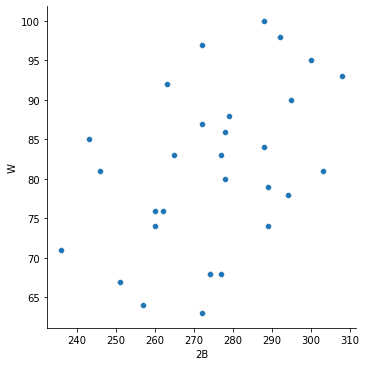

In [66]:
Double_3=sns.relplot(x="2B",y="W",kind="scatter",data=Baseball)
#As the double hits increase, so does the chances to win in most cases.

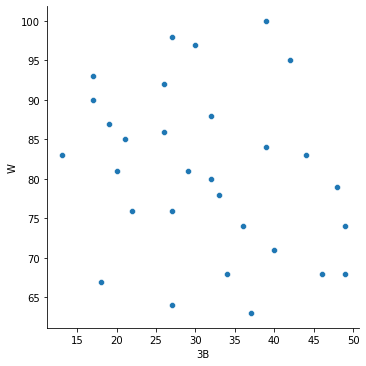

In [67]:
Triple_3=sns.relplot(x="3B",y="W",kind="scatter",data=Baseball)
#Triple hots in the range of 20 to 35 have higher chances of wins in most cases

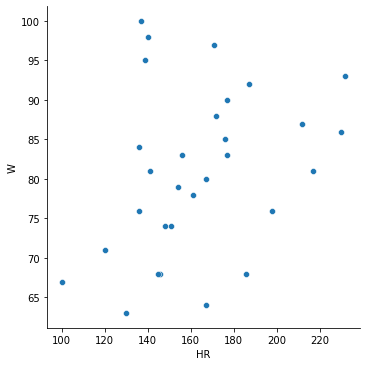

In [68]:
Home_Run_3=sns.relplot(x="HR",y="W",kind="scatter",data=Baseball)
#Home runs in the range of 140-180 have higher chances of wins in most cases

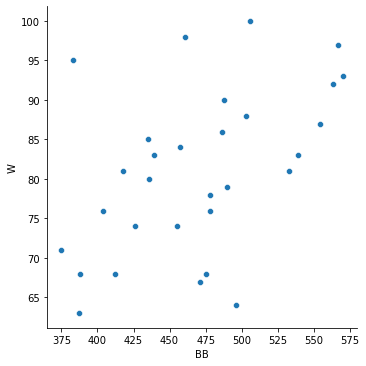

In [69]:
Walk_to_strikeout_ratio_3=sns.relplot(x="BB",y="W",kind="scatter",data=Baseball)
#As walk to strikeout ratio increases, the chances of wins also increase in most cases

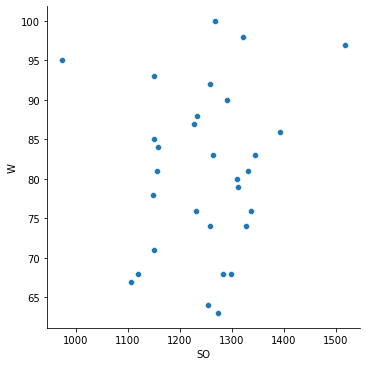

In [70]:
Plate_appearances_per_strikeout_3=sns.relplot(x="SO",y="W",kind="scatter",data=Baseball)
#As plate appearances per strikeout increases, so does the chances to win in most cases.

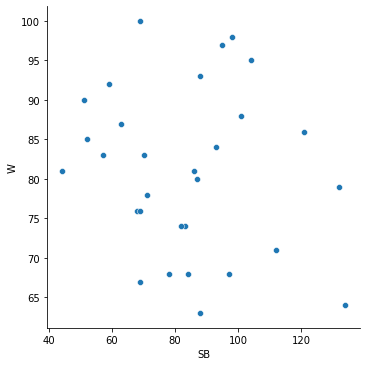

In [71]:
Stolen_Bases_3=sns.relplot(x="SB",y="W",kind="scatter",data=Baseball)
#The chances of wins increase with stolen bases in the range of 60 to 100 in most cases

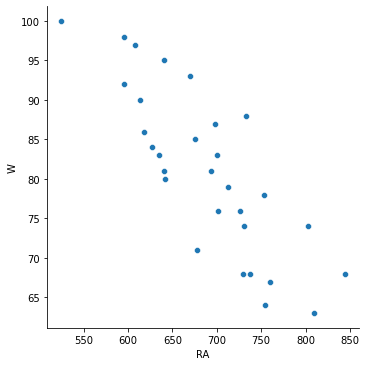

In [74]:
Run_Average_3=sns.relplot(x="RA",y="W",kind="scatter",data=Baseball)
#As the run average drops, the chances of wins increase in most cases

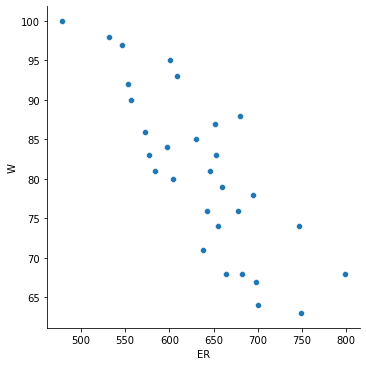

In [75]:
Earned_Runs_3=sns.relplot(x="ER",y="W",kind="scatter",data=Baseball)
#As earned runs drops, the chances to win increase in most cases

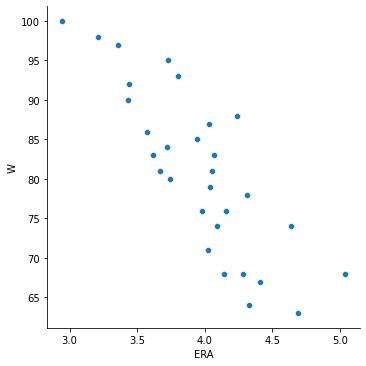

In [76]:
Earned_Runs_Average_3=sns.relplot(x="ERA",y="W",kind="scatter",data=Baseball)
#As earned runs average drops, the chances to win increase in most case

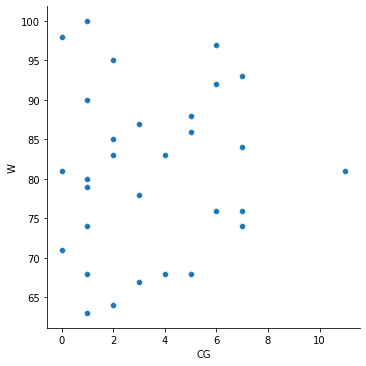

In [77]:
Complete_Games_3=sns.relplot(x="CG",y="W",kind="scatter",data=Baseball)
#No concrete conclusion can be drwan but most data points lie between 2 to 6 and as the number of games completed increases the chances to win increase in most cases in that range of completed games.

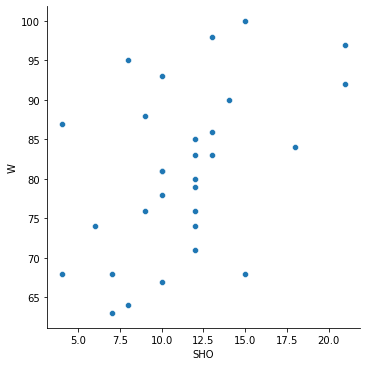

In [78]:
Shoutouts_3=sns.relplot(x="SHO",y="W",kind="scatter",data=Baseball)
#As shoutouts increase, the chnaces to win also increases in most cases

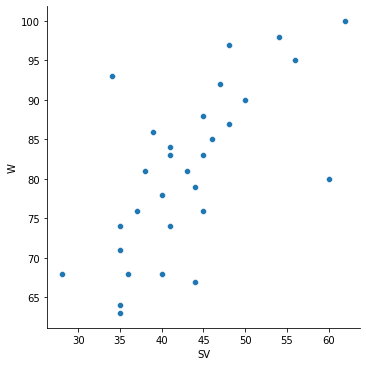

In [81]:
Saves_3=sns.relplot(x="SV",y="W",kind="scatter",data=Baseball)
#As the number of saves increaases, the chances to win also increase in most cases

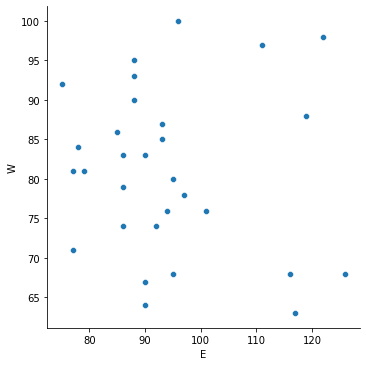

In [82]:
Errors_3=sns.relplot(x="E",y="W",kind="scatter",data=Baseball)
#No concrete conculsion can be drawn.Most errors lie between 90 to 100. As the errors reduces, the chances to win increase in that range of errors.

In [86]:
#Lets remove outliers using zscore
zscore(Baseball)

array([[ 1.36540860e+00,  6.19077968e-01,  8.47731264e-01,
         1.66368512e+00,  1.42017307e+00,  1.04119304e+00,
        -7.87298598e-01, -1.53490242e+00, -2.69762957e+00,
         9.13883291e-01, -6.66233927e-01, -5.05110079e-01,
        -5.06955186e-01, -5.39806195e-01, -8.14628593e-01,
         1.67160651e+00, -4.61469635e-01],
       [ 1.97838300e-01,  1.34431656e-01, -7.11093535e-01,
        -9.70680764e-01,  1.27403389e-01,  1.23580856e+00,
        -2.43966683e-01, -5.36591904e-01,  1.54878442e-01,
        -6.01825582e-01,  1.65970766e-01,  2.48929848e-01,
         2.54597523e-01, -5.39806195e-01,  1.72800005e-01,
         2.49879323e-01, -6.07196888e-01],
       [ 3.24325082e-03, -3.32905860e-01, -1.11523330e+00,
        -1.51891367e-01,  1.58879521e+00, -2.23807850e-01,
        -7.23377196e-01,  1.13914361e+00, -8.93981893e-01,
         1.11449182e-01, -6.80339091e-01, -7.51623132e-01,
        -6.41346840e-01,  2.77264091e+00, -3.20914294e-01,
        -6.54856158e-01, -1.1

In [88]:
z=np.abs(zscore(Baseball))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [89]:
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [91]:
Baseball_New=Baseball[(z<3).all(axis=1)]
Baseball_New

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [92]:
Baseball_New.shape
#Since the data loss as per the new dataset is around 3%, we can go ahead with the new dataset for our analysis

(29, 17)

In [93]:
#Now lets check for the skewness in the dataset and treat if the values are above 0.5
Baseball_New.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [94]:
#As per the skewness check above, we can remove the skewness in H,CG,SHO,SV,E
#Lets use power transform function for the same to remove skewness

In [96]:
Baseball_New["H"]=power_transform(Baseball_New["H"].values.reshape(-1,1))

In [97]:
Baseball_New["CG"]=power_transform(Baseball_New["CG"].values.reshape(-1,1))

In [98]:
Baseball_New["SHO"]=power_transform(Baseball_New["SHO"].values.reshape(-1,1))

In [100]:
Baseball_New["SV"]=power_transform(Baseball_New["SV"].values.reshape(-1,1))

In [101]:
Baseball_New["E"]=power_transform(Baseball_New["E"].values.reshape(-1,1))

In [102]:
#Lets check the skewness again after removing it from the above mentioned attributes

In [103]:
Baseball_New.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.033949
E      0.065585
dtype: float64

In [104]:
#We seem to have treated all the skewness from the attributes mentioned above.

In [105]:
#Now lets separate variables x and y before performing machine learning

In [110]:
# We have called all the independent variables
x=Baseball_New.iloc[:,1:]
x.shape

(29, 16)

In [112]:
#Now lets call the target variable
y=Baseball_New["W"]
y.shape

(29,)

In [113]:
#Now lets use standard scaler to scale down the independent variables  inorder to create unbiasness for the algorithms to learn 

In [115]:
S=StandardScaler()
x=S.fit_transform(x)
x

array([[ 9.59398345e-01,  8.30084222e-01,  0.00000000e+00,
         1.55653766e+00,  1.01084549e+00, -7.65863143e-01,
        -1.53635899e+00, -2.72762331e+00,  9.05952902e-01,
        -6.64513529e-01, -5.11148124e-01, -5.11388277e-01,
        -3.07098204e-01, -7.87002186e-01,  1.52534194e+00,
        -3.48265262e-01],
       [ 3.31147171e-01, -7.02830744e-01,  0.00000000e+00,
         2.01171316e-01,  1.20891656e+00, -1.81388639e-01,
        -4.95020511e-01,  1.21895521e-01, -5.85315147e-01,
         1.54638235e-01,  2.32160816e-01,  2.38952260e-01,
        -3.07098204e-01,  2.36736538e-01,  3.16899471e-01,
        -5.40819806e-01],
       [-2.74666462e-01, -1.10025314e+00,  0.00000000e+00,
         1.73332457e+00, -2.76616501e-01, -6.97101437e-01,
         1.25294051e+00, -9.25865699e-01,  1.16458052e-01,
        -6.78397458e-01, -7.54152970e-01, -6.43801313e-01,
         2.01131531e+00, -2.52844176e-01, -6.61517926e-01,
        -1.32612477e+00],
       [-1.32923093e+00,  2.33950624e

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 16)
(9, 16)
(20,)
(9,)


In [152]:
#Lets use four algorithms to check the r2 score. The algorithms used are: 1) Linear Regression,2) Decision Tree,3)Lasso,4)Ridge

In [161]:
#1) Linear Regression
lm=LinearRegression()
lm.fit(x_train,y_train)
#lets predict y values
pred1=lm.predict(x_test)
print(r2_score(y_test,pred1))
score1=cross_val_score(lm,x,y,cv=5)
print(score1)
print(score1.mean())
print(score1.std())

0.79620560451077
[ 0.73767888 -0.35726093  0.64160283  0.35499186 -0.2805967 ]
0.21928318826804913
0.457774581375957


In [171]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
#predict y_values
pred2=knn.predict(x_test)
print(r2_score(y_test,pred2))
score2=cross_val_score(knn,x,y,cv=5)
print(score2)
print(score2.mean())
print(score2.std())

0.6122505161734344
[ 0.03986364 -1.74947368  0.37873693  0.36019672  0.80542453]
-0.033050373615756114
0.8920400951039675


In [178]:
#3) Lasso
ls=Lasso()
ls.fit(x_train,y_train)
#predict y_values
pred3=ls.predict(x_test)
print(r2_score(y_test,pred3))
score3=cross_val_score(ls,x,y,cv=5)
print(score3)
print(score3.mean())
print(score3.std())

0.8640443272627811
[ 0.74286211 -0.60554234  0.75646712  0.78086991  0.88086062]
0.5111034843436381
0.5604119083062634


In [179]:
#4) Ridge
rd=Ridge()
rd.fit(x_train,y_train)
#predict y_values
pred4=rd.predict(x_test)
print(r2_score(y_test,pred4))
score4=cross_val_score(rd,x,y,cv=5)
print(score4)
print(score4.mean())
print(score4.std())

0.9260638290495905
[ 0.61102103 -0.80556364  0.71144984  0.90842608  0.81709529]
0.4484857213016962
0.6349213817686078


In [184]:
# Lasso is the best fit model as the difference between the r2_score and cross_val_score mean is the least. 
#Lets perform hypertuning to increase the r2_score

In [193]:
parameters={"alpha":[0.1,0,0.001,0.0001],"fit_intercept":[True,False],"normalize":[True,False],"max_iter":[1000,750,1100,500],"random_state":[42,20,60,80]}
rsearch=RandomizedSearchCV(ls,parameters)
rsearch.fit(x_train,y_train)

RandomizedSearchCV(estimator=Lasso(),
                   param_distributions={'alpha': [0.1, 0, 0.001, 0.0001],
                                        'fit_intercept': [True, False],
                                        'max_iter': [1000, 750, 1100, 500],
                                        'normalize': [True, False],
                                        'random_state': [42, 20, 60, 80]})

In [194]:
print(rsearch.best_params_)
print(rsearch.best_score_)
print(rsearch.best_estimator_)

{'random_state': 42, 'normalize': True, 'max_iter': 500, 'fit_intercept': True, 'alpha': 0.0001}
-1.7834081763500471
Lasso(alpha=0.0001, max_iter=500, normalize=True, random_state=42)


In [197]:
#now lets put these values back to the lasso model
ls1=Lasso(normalize=False,max_iter=1100,fit_intercept=True,alpha=0.1,random_state=42)
ls1.fit(x_train,y_train)
#predict y_values
pred5=ls1.predict(x_test)
print(r2_score(y_test,pred5))

0.9185507488864348


In [196]:
#Lets serialise the model
joblib.dump(ls,"ls1.obj")

['ls1.obj']